In [41]:
#importing important libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import dash
from dash import html, dcc
import plotly.express as px

In [2]:
#reading a the 10000 sales 
df=pd.read_csv(r'C:\Users\mohamed waheed\Desktop\10000SalesRecords.csv')

In [3]:
# showing first 5 rows of the data
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,Chad,Office Supplies,Online,L,1/27/2011,292494523,2/12/2011,4484,651.21,524.96,2920025.64,2353920.64,566105.00
1,Europe,Latvia,Beverages,Online,C,12/28/2015,361825549,1/23/2016,1075,47.45,31.79,51008.75,34174.25,16834.50
2,Middle East and North Africa,Pakistan,Vegetables,Offline,C,1/13/2011,141515767,2/1/2011,6515,154.06,90.93,1003700.90,592408.95,411291.95
3,Sub-Saharan Africa,Democratic Republic of the Congo,Household,Online,C,9/11/2012,500364005,10/6/2012,7683,668.27,502.54,5134318.41,3861014.82,1273303.59
4,Europe,Czech Republic,Beverages,Online,C,10/27/2015,127481591,12/5/2015,3491,47.45,31.79,165647.95,110978.89,54669.06


In [4]:
# showing some statistical info about the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Order ID,10000.0,5.498719e+08,2.607835e+08,1.000892e+08,3.218067e+08,5.485663e+08,7.759981e+08,9.999342e+08
Units Sold,10000.0,5.002856e+03,2.873246e+03,2.000000e+00,2.530750e+03,4.962000e+03,7.472000e+03,1.000000e+04
Unit Price,10000.0,2.681431e+02,2.179441e+02,9.330000e+00,1.092800e+02,2.057000e+02,4.372000e+02,6.682700e+02
Unit Cost,10000.0,1.888066e+02,1.764459e+02,6.920000e+00,5.667000e+01,1.171100e+02,3.646900e+02,5.249600e+02
Total Revenue,10000.0,1.333355e+06,1.465026e+06,1.679400e+02,2.885511e+05,8.000512e+05,1.819143e+06,6.680027e+06
Total Cost,10000.0,9.382658e+05,1.145914e+06,1.245600e+02,1.647855e+05,4.816058e+05,1.183822e+06,5.241726e+06
Total Profit,10000.0,3.950893e+05,3.775550e+05,4.338000e+01,9.832914e+04,2.890990e+05,5.664227e+05,1.738178e+06


In [5]:
# showing some info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          10000 non-null  object 
 1   Country         10000 non-null  object 
 2   Item Type       10000 non-null  object 
 3   Sales Channel   10000 non-null  object 
 4   Order Priority  10000 non-null  object 
 5   Order Date      10000 non-null  object 
 6   Order ID        10000 non-null  int64  
 7   Ship Date       10000 non-null  object 
 8   Units Sold      10000 non-null  int64  
 9   Unit Price      10000 non-null  float64
 10  Unit Cost       10000 non-null  float64
 11  Total Revenue   10000 non-null  float64
 12  Total Cost      10000 non-null  float64
 13  Total Profit    10000 non-null  float64
dtypes: float64(5), int64(2), object(7)
memory usage: 1.1+ MB


In [6]:
# checking if there is dublicates
df.duplicated().sum()

np.int64(0)

In [7]:
# checking if there is null data
df.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [8]:
# solving scientific notation issue
pd.set_option('display.float_format', '{:,.2f}'.format)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          10000 non-null  object 
 1   Country         10000 non-null  object 
 2   Item Type       10000 non-null  object 
 3   Sales Channel   10000 non-null  object 
 4   Order Priority  10000 non-null  object 
 5   Order Date      10000 non-null  object 
 6   Order ID        10000 non-null  int64  
 7   Ship Date       10000 non-null  object 
 8   Units Sold      10000 non-null  int64  
 9   Unit Price      10000 non-null  float64
 10  Unit Cost       10000 non-null  float64
 11  Total Revenue   10000 non-null  float64
 12  Total Cost      10000 non-null  float64
 13  Total Profit    10000 non-null  float64
dtypes: float64(5), int64(2), object(7)
memory usage: 1.1+ MB


In [10]:
#changing the date to be to_datetime
df['Order Date']=pd.to_datetime(df['Order Date'])
df['Ship Date']=pd.to_datetime(df['Ship Date'])


In [11]:
#changing object to category
df['Region']=df['Region'].astype('category')
df['Country']=df['Country'].astype('category')
df['Item Type']=df['Item Type'].astype('category')
df['Sales Channel']=df['Sales Channel'].astype('category')
df['Order Priority']=df['Order Priority'].astype('category')

In [12]:
# creating new column(to period)
df['month']=df['Order Date'].dt.to_period('M').astype('str')

In [13]:
# Top 5 most profitable products
top_profitable_items = df.groupby('Item Type')['Total Profit'].sum().sort_values(ascending=False).head()
top_profitable_items

C:\Users\mohamed waheed\AppData\Local\Temp\ipykernel_14016\3069038125.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_profitable_items = df.groupby('Item Type')['Total Profit'].sum().sort_values(ascending=False).head()


Item Type
Household         718,738,361.19
Cosmetics         713,439,032.30
Office Supplies   520,183,203.75
Baby Food         402,324,995.16
Cereal            372,378,674.46
Name: Total Profit, dtype: float64

In [14]:
# Top 5 regions by revenue
top_revenue_regions = df.groupby("Region")["Total Revenue"].sum().sort_values(ascending=False).head()
top_revenue_regions

C:\Users\mohamed waheed\AppData\Local\Temp\ipykernel_14016\2388182306.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_revenue_regions = df.groupby("Region")["Total Revenue"].sum().sort_values(ascending=False).head()


Region
Europe                              3,481,372,072.75
Sub-Saharan Africa                  3,350,555,775.36
Asia                                2,005,305,576.02
Middle East and North Africa        1,715,633,497.66
Central America and the Caribbean   1,395,529,712.51
Name: Total Revenue, dtype: float64

In [17]:
# monthly revenue
monthly_revenue = df.groupby('month')['Total Revenue'].sum()
monthly_revenue

month
2010-01   156,931,666.08
2010-02   131,751,195.97
2010-03   135,689,097.72
2010-04   120,181,973.02
2010-05   125,011,735.03
               ...      
2017-03   140,984,549.42
2017-04   106,894,914.71
2017-05   165,377,278.30
2017-06   124,732,019.02
2017-07   170,797,235.20
Name: Total Revenue, Length: 91, dtype: float64

C:\Users\mohamed waheed\AppData\Local\Temp\ipykernel_14016\1055955631.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=monthly_revenue.index, y=monthly_revenue.values, marker='o', palette='magma', color='black')


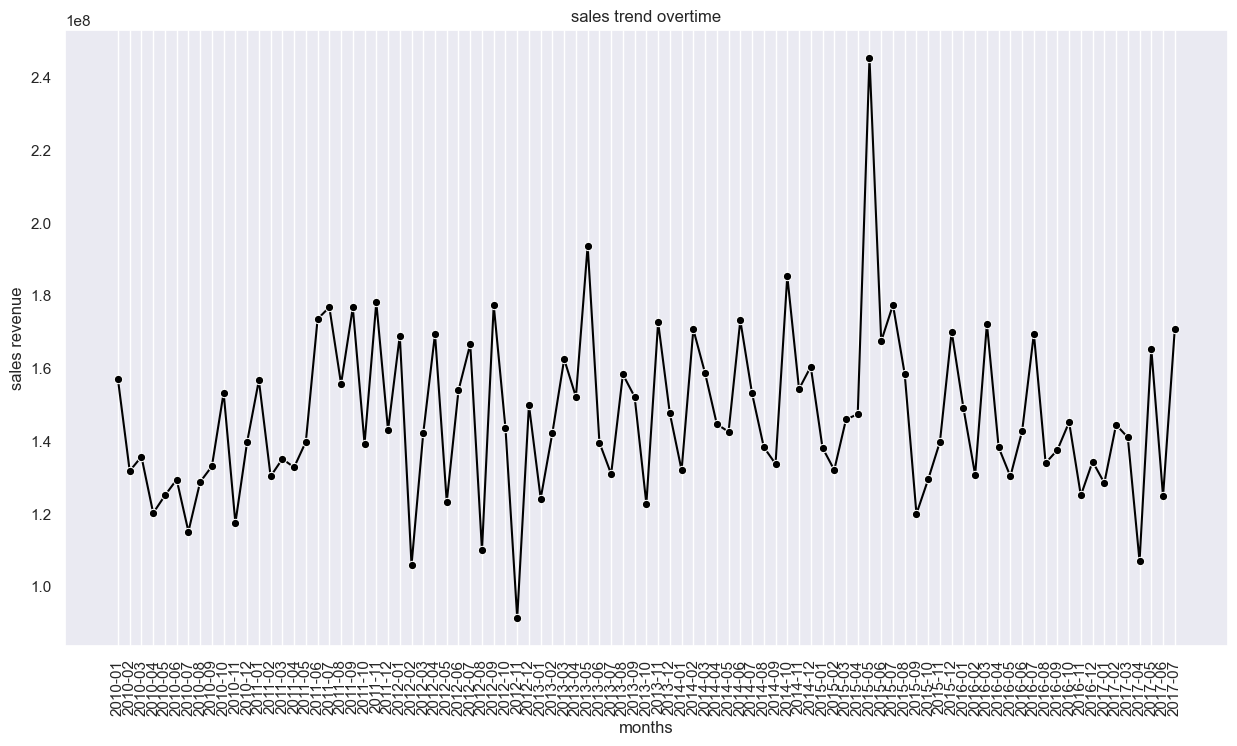

In [ ]:
#showing the sales trend overtime
plt.figure(figsize=(15,8))
sns.lineplot(x=monthly_revenue.index, y=monthly_revenue.values, marker='o', palette='magma', color='black')
plt.title('sales trend overtime')
plt.xlabel('months')
plt.ylabel('sales revenue')
plt.xticks(rotation=90)
plt.grid(axis='x')
sns.set(style='darkgrid')
plt.show()

C:\Users\mohamed waheed\AppData\Local\Temp\ipykernel_14016\823168349.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_revenue_regions.index, y=top_revenue_regions.values,  palette='magma', color='black', estimator=sum)


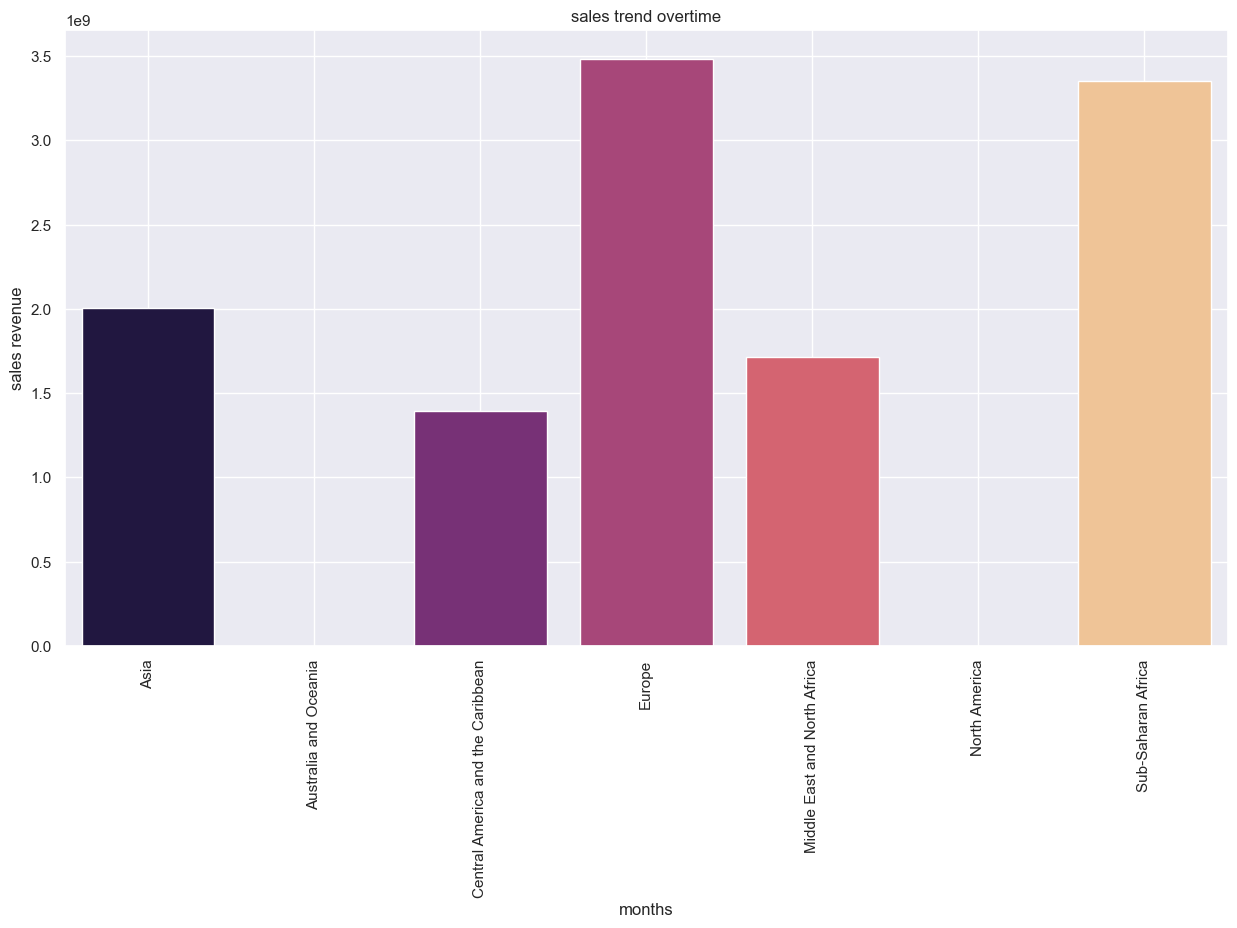

In [38]:
#showing the top revenue regions
plt.figure(figsize=(15,8))
sns.barplot(x=top_revenue_regions.index, y=top_revenue_regions.values,  palette='magma', color='black', estimator=sum)
plt.title('sales trend overtime')
plt.xlabel('months')
plt.ylabel('sales revenue')
plt.xticks(rotation=90)
plt.grid(axis='x')
sns.set(style='darkgrid')
plt.show()

C:\Users\mohamed waheed\AppData\Local\Temp\ipykernel_14016\2155348356.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_profitable_items.index, y=top_profitable_items.values, palette='magma', color='black')


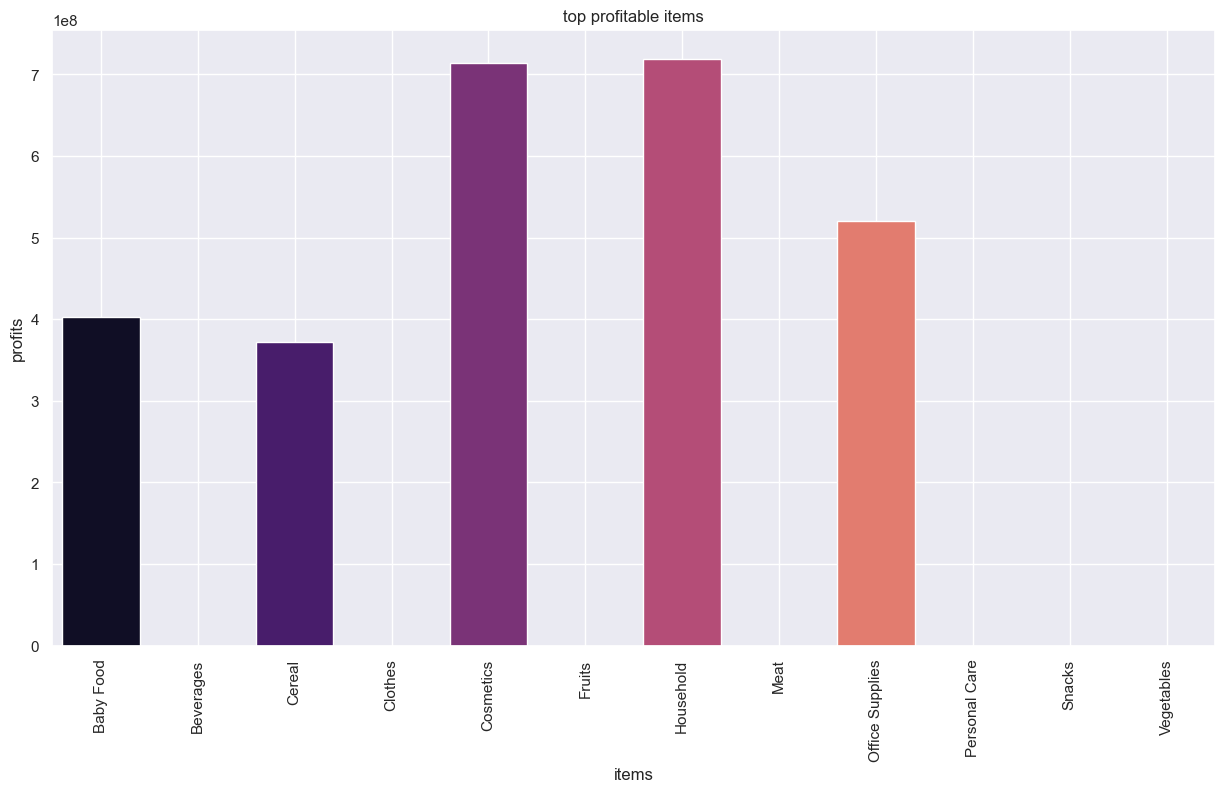

In [39]:
#showing the sales trend overtime
plt.figure(figsize=(15,8))
sns.barplot(x=top_profitable_items.index, y=top_profitable_items.values, palette='magma', color='black')
plt.title('top profitable items')
plt.xlabel('items')
plt.ylabel('profits')
plt.xticks(rotation=90)
plt.grid(axis='x')
sns.set(style='darkgrid')
plt.show()

In [ ]:
# Initialize app
app = dash.Dash(__name__)
server = app.server
# Dash figures
fig1 = px.bar(top_profitable_items, title="Top 5 Most Profitable Products", labels={"value": "Profit", "index": "Product"})
fig2 = px.bar(top_revenue_regions, title="Top 5 Regions by Revenue", labels={"value": "Revenue", "index": "Region"})
fig3 = px.line(monthly_revenue, title="Monthly Revenue Trend", labels={"value": "Revenue", "index": "Month"})
# Layout
app.layout = html.Div([
    html.H1("Sales Data Dashboard", style={"textAlign": "center"}),
    
    html.Div([
        dcc.Graph(figure=fig1),
        dcc.Graph(figure=fig2),
    ], style={"display": "flex", "flexWrap": "wrap", "justifyContent": "space-around"}),

    html.Div([
        dcc.Graph(figure=fig3),
    ], style={"display": "flex", "flexWrap": "wrap", "justifyContent": "space-around"}),
])

# Run app
if __name__ == "__main__":
    app.run(debug=True)